In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [3]:
h = tf.constant("hello")
w = tf.constant(" tensorflow!!")
hw = h+w

tf.print(hw)

hello tensorflow!!


In [4]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)
tf.print(node3)

7


In [8]:
tensor_a = tf.constant("hello")


In [9]:
tensor_a.numpy().decode('utf-8')

'hello'

In [7]:
tensor_b = tf.constant(100)
tensor_b.numpy()

100

In [12]:
tensor_a = tf.constant(2)
tensor_b = tf.constant(3)
tensor_c = tf.constant(4)

tensor_d = tf.add(tensor_a,tensor_b)
tf.print(tensor_d)

5


In [14]:
tensor_matA =  tf.constant([[1,2], [3,4]])
tensor_matA

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [19]:
tensor_matB =  tf.constant([[2,0], [0,2]])
tensor_matB

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 0],
       [0, 2]])>

In [20]:
tensor_matC = tf.matmul(tensor_matA,tensor_matB)
tf.print(tensor_matC)
tensor_matA*tensor_matB

[[2 4]
 [6 8]]


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 0],
       [0, 8]])>

In [22]:
tensor_e = tf.constant(0.4)
tensor_e

<tf.Tensor: shape=(), dtype=float32, numpy=0.4>

In [29]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [30]:
add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

In [31]:
print("add =", add.numpy())
print("sub =", sub.numpy())
print("mul =", mul.numpy())
print("div =", div.numpy())

add = 5
sub = -1
mul = 6
div = 0.6666666666666666


In [32]:
mean = tf.reduce_mean([a,b,c])
sum = tf.reduce_sum([a,b,c])

print("mean :",mean.numpy())
print("sum :",sum.numpy())

mean : 3
sum : 10


In [34]:
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])
add = tf.add(matrix1,matrix2)
sub = tf.subtract(matrix1,matrix2)

In [36]:
print(add)
print(sub)

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)


In [47]:
import numpy as np

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [91]:
rng = np.random
learning_rate = 0.01
training_steps = 1000
display_step = 50


In [92]:
W = tf.Variable(rng.randn(),name='weight')
b = tf.Variable(rng.randn(),name='bias')

In [93]:
def linear_regression(x):
    return W*x + b

In [94]:
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [111]:
optimizer = tf.optimizers.Adadelta(learning_rate)

In [112]:
#optimazation process
def run_optimization():
  with tf.GradientTape() as g:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
  #compute gradient
  gradients = g.gradient(loss, [W,b])
  #update W and b
  optimizer.apply_gradients(zip(gradients,[W,b]))

In [113]:
for step in range(1, training_steps+1):
  run_optimization()

  if step % display_step == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: %d, loss: %f, W:%f, b:%f"%
          (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.153912, W:0.252604, b:0.799771
step: 100, loss: 0.153875, W:0.252186, b:0.799354
step: 150, loss: 0.153862, W:0.251912, b:0.799081
step: 200, loss: 0.153858, W:0.251738, b:0.798908
step: 250, loss: 0.153858, W:0.251650, b:0.798822
step: 300, loss: 0.153858, W:0.251634, b:0.798807
step: 350, loss: 0.153858, W:0.251634, b:0.798807
step: 400, loss: 0.153858, W:0.251634, b:0.798807
step: 450, loss: 0.153858, W:0.251634, b:0.798807
step: 500, loss: 0.153858, W:0.251634, b:0.798807
step: 550, loss: 0.153858, W:0.251634, b:0.798807
step: 600, loss: 0.153858, W:0.251634, b:0.798807
step: 650, loss: 0.153858, W:0.251634, b:0.798807
step: 700, loss: 0.153858, W:0.251634, b:0.798807
step: 750, loss: 0.153858, W:0.251634, b:0.798807
step: 800, loss: 0.153858, W:0.251634, b:0.798807
step: 850, loss: 0.153858, W:0.251634, b:0.798807
step: 900, loss: 0.153858, W:0.251634, b:0.798807
step: 950, loss: 0.153858, W:0.251634, b:0.798807
step: 1000, loss: 0.153858, W:0.251634, b:0.798807


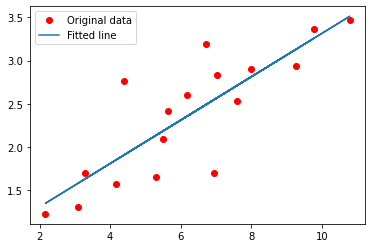

In [114]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()